In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  # to display the chart inside the jupyter %notebook

In [30]:
df1 = pd.read_csv("D:/dat5/sales_w05.csv",sep=",")
df2 = pd.read_csv("D:/dat5/sales_w06.csv",sep=",")
print df1.shape
print df2.shape

(25000, 27)
(25000, 27)


In [11]:
df2.dtypes

Unnamed: 0          int64
Row.ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer.Name      object
Segment            object
City               object
State              object
Country            object
Postal.Code       float64
Market             object
Region             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
Return             object
Returned            int64
dtype: object

In [31]:
df1['Sales'] = pd.to_numeric(df1['Sales'].str.replace(r'[$,]',''))

In [27]:
print df1.dtypes
print df1.head()

Unnamed: 0          int64
Row.ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer.Name      object
Segment            object
City               object
State              object
Country            object
Postal.Code       float64
Market             object
Region             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
Return             object
Returned            int64
dtype: object
   Unnamed: 0  Row.ID         Order_ID  Order_Date   Ship_Date     Ship_Mode  \
0           1   32298   CA-2012-124891   7/31/2012   7/31/2012      Same Day   
1           2   26341    IN-2013-77878    2/5/2013    2/7/2013  Second Class   
2           3   25330    IN-2013-71249  10/1

In [32]:
# row wise concatenation
df3 = pd.concat((df1,df2),axis=0)

In [17]:
df3.shape

(50000, 27)

In [33]:
df3.dtypes

Unnamed: 0          int64
Row.ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer.Name      object
Segment            object
City               object
State              object
Country            object
Postal.Code       float64
Market             object
Region             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
Return             object
Returned            int64
dtype: object

In [43]:
# drop columns those are irrelevant
# drops = df3['Postal.Code']
df3.drop(columns=['Postal.Code'],axis=1,inplace=True)


In [44]:
df3.dtypes

Unnamed: 0          int64
Row.ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer.Name      object
Segment            object
City               object
State              object
Country            object
Market             object
Region             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
Return             object
Returned            int64
dtype: object

In [47]:
print df2['Category'].unique()
print df2['Category'].value_counts()
print df2['Sub.Category'].unique()
print df2['Sub.Category'].value_counts()


['Technology' 'Furniture' 'Office Supplies']
Office Supplies    9882
Technology         7945
Furniture          7173
Name: Category, dtype: int64
['Accessories' 'Chairs' 'Phones' 'Copiers' 'Tables' 'Binders' 'Supplies'
 'Appliances' 'Machines' 'Bookcases' 'Storage' 'Furnishings' 'Art' 'Paper'
 'Envelopes' 'Fasteners' 'Labels']
Storage        2835
Chairs         2765
Phones         2719
Bookcases      2239
Copiers        2075
Accessories    1931
Art            1514
Furnishings    1359
Appliances     1307
Binders        1259
Machines       1220
Paper           980
Supplies        878
Tables          810
Envelopes       682
Fasteners       244
Labels          183
Name: Sub.Category, dtype: int64


In [49]:
df3.isnull().sum()

Unnamed: 0          0
Row.ID              0
Order_ID            0
Order_Date          0
Ship_Date           0
Ship_Mode           0
Customer_ID         0
Customer.Name       0
Segment             8
City                0
State               0
Country             0
Market              0
Region              0
Product.ID          0
Category            0
Sub.Category        0
Product.Name        0
Sales             112
Quantity            0
Discount            0
Profit              0
Shipping_Cost       0
Order_Priority      0
Return              0
Returned            0
dtype: int64

In [58]:
import datetime as dt
df3['Order_Date'] = pd.to_datetime(df3.Order_Date)
df3['year'] = df3['Order_Date'].dt.year
df3['month'] = df3['Order_Date'].dt.month
df3['day'] = df3['Order_Date'].dt.day
df3['dayofweek'] = df3['Order_Date'].dt.dayofweek

df3['days'] = df3[['Order_Date']].apply(lambda x: dt.datetime.strftime(x['Order_Date'],'%A'),axis=1)


In [60]:
df3.dtypes

Unnamed: 0                 int64
Row.ID                     int64
Order_ID                  object
Order_Date        datetime64[ns]
Ship_Date                 object
Ship_Mode                 object
Customer_ID               object
Customer.Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping_Cost            float64
Order_Priority            object
Return                    object
Returned                   int64
year                       int64
month                      int64
day                        int64
dayofweek                  int64
days      

In [70]:
df3['Sales'] = df3.Sales/100000
df_pv2 = pd.pivot_table(df3,index=['Category','dayofweek'],values=['Sales'],aggfunc=[np.sum],dropna=False)
df_pv2

sum
                               Sales
Category        dayofweek           
Furniture       0          13.577724
                1          13.137826
                2          12.788853
                3          13.869003
                4          14.418075
                5           8.027567
                6           1.587247
Office Supplies 0          10.120371
                1          10.951345
                2           9.736452
                3          10.282096
                4          10.973296
                5           5.504994
                6           0.873131
Technology      0          16.045497
                1          16.487567
                2          16.122649
                3          16.142983
                4          16.154218
                5           7.631231
                6           1.506944

In [67]:
1.506944 * 10**5

150694.4

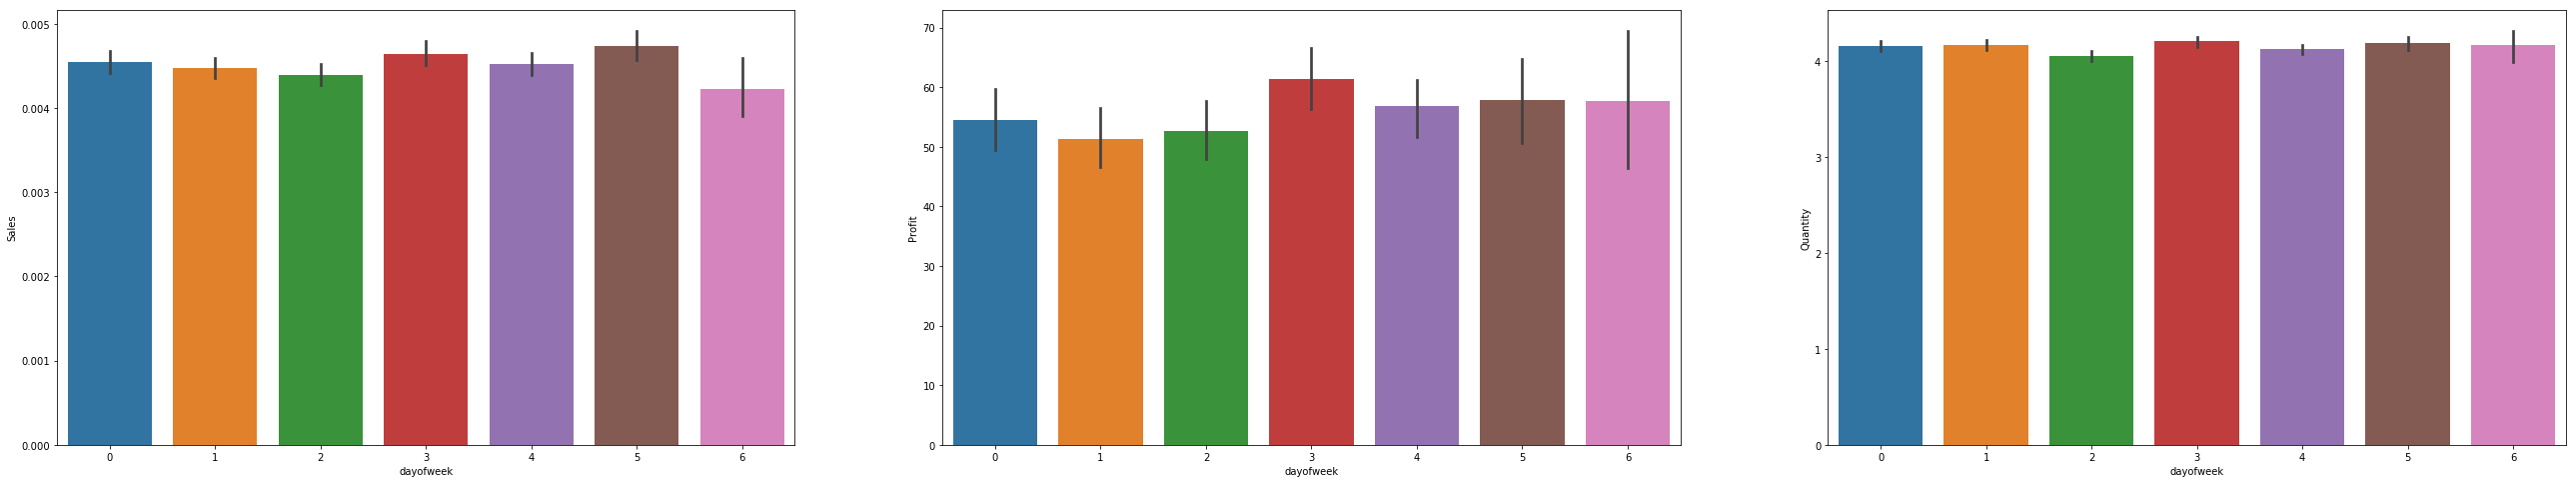

In [88]:
# figsizxe = (width,height)
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(45,8))
sns.barplot(x='dayofweek' , y= 'Sales' , data = df3,ax=axis1)
sns.barplot(x='dayofweek' , y= 'Profit' , data = df3,ax=axis2)
sns.barplot(x='dayofweek' , y= 'Quantity' , data = df3,ax=axis3)

In [89]:
seg_cat_sales = pd.pivot_table(df3,values='Sales',index='Segment',columns=['Category'], aggfunc='sum')
seg_cat_sales

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,40.203551,30.343238,45.873154
Corporate,23.689732,17.540441,26.883656
Home Office,13.393027,10.558005,17.155416


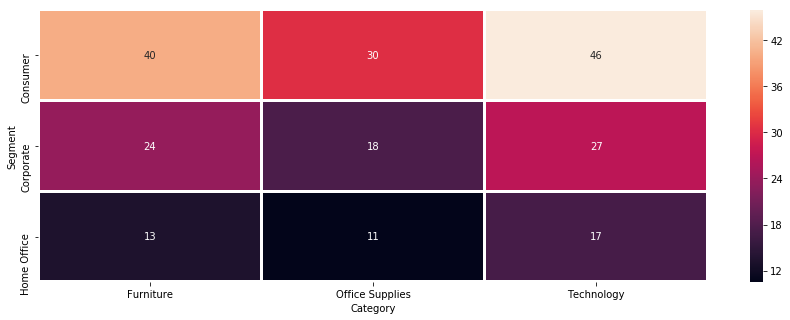

In [94]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(seg_cat_sales,annot=True,linewidth=2)